In [57]:
#dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import pandas as pd
import numpy as np
import gmaps
import statsmodels.api as sm


In [58]:
#read csv and create DF
HOR_CSV = pd.read_csv("Homeownership_ACS.clean")
HOR_df = pd.DataFrame(HOR_CSV)

Income_Data = pd.read_csv("income_data_clean")
Income_df = pd.DataFrame(Income_Data)
Income_df.head()


,Unnamed: 0,county,2015
0,0,"Autauga, AL",38591
1,1,"Baldwin, AL",41412
2,2,"Barbour, AL",31509
3,3,"Bibb, AL",29048
4,4,"Blount, AL",31987


In [59]:
# declare column names in df
HOR_df = HOR_df[["County", "HOR"]]
Income_df = Income_df[["county","2015"]]
#change column name
HOR_df  = HOR_df.rename(columns={"County": "county"})
#print head
HOR_df.head()

,county,HOR
0,"Autauga, AL",73.3
1,"Baldwin, AL",72.9
2,"Barbour, AL",62.5
3,"Bibb, AL",75.4
4,"Blount, AL",78.5


In [60]:
#get sample of HOR DF
sample_home_ownership = HOR_df.sample(n=1000)
sample_home_ownership = sample_home_ownership.reset_index(drop=True)
sample_home_ownership.head()

,county,HOR
0,"Wabasha, MN",80.9
1,"Jefferson, KS",81.8
2,"Kiowa, CO",76.0
3,"Hardin, TN",75.1
4,"Rusk, TX",76.1


In [61]:
#SAMPLE OF INCOME DF
Income_Analysis = sample_home_ownership.merge(Income_df, on="county")
Income_Analysis.head()

,county,HOR,2015
0,"Wabasha, MN",80.9,43325
1,"Jefferson, KS",81.8,39161
2,"Kiowa, CO",76.0,51397
3,"Hardin, TN",75.1,35854
4,"Mason, WV",77.5,29746


In [62]:
#AMOUNT OF VALUES FOUND
len(Income_Analysis)

729

## ANALYSIS


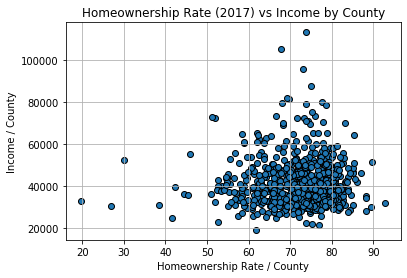

In [63]:
plt.scatter(Income_Analysis["HOR"], Income_Analysis["2015"], marker="o", edgecolor='black')
plt.title("Homeownership Rate (2017) vs Income by County")
plt.xlabel("Homeownership Rate / County")
plt.ylabel("Income / County")
plt.grid(True)
plt.savefig('Pictures/Post_sec_scatter.png')

In [64]:
x = Income_Analysis["HOR"]
y = Income_Analysis["2015"]
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   2015   R-squared (uncentered):                   0.920
Model:                            OLS   Adj. R-squared (uncentered):              0.920
Method:                 Least Squares   F-statistic:                              8391.
Date:                Mon, 09 Sep 2019   Prob (F-statistic):                        0.00
Time:                        19:05:19   Log-Likelihood:                         -7879.8
No. Observations:                 729   AIC:                                  1.576e+04
Df Residuals:                     728   BIC:                                  1.577e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HOR          563.6481      6.153     91.600      0.000     551.568     575.728
==============================================================================
Omnibus:                      235.204   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              799.006
Skew:                           1.527   Prob(JB):                    3.15e-174
Kurtosis:                       7.120   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# Set line
(slope, intercept, _, _, _) = linregress(x, y)
fit = slope * x + intercept

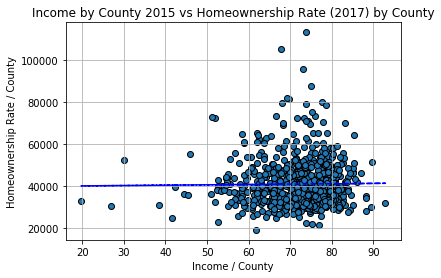

In [67]:
plt.scatter(Income_Analysis["HOR"], Income_Analysis["2015"], marker="o", edgecolor='black')
plt.title("Income by County 2015 vs Homeownership Rate (2017) by County")
plt.ylabel("Homeownership Rate / County")
plt.xlabel("Income / County")
plt.grid(True)
plt.plot(x, fit, 'b--')
plt.savefig('Pictures/Post_sec_regression.png')